In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
import os
import random
warnings.filterwarnings('ignore')

## 過濾用不到的Country 資訊

In [2]:
non_country_list = ['Arab World', 'Central Europe and the Baltics', 'Caribbean small states', 'East Asia & Pacific (excluding high income)',
                    'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
                    'Europe & Central Asia', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'High income',
                    'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
                    'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean', 'Least developed countries: UN classification',
                    'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 'Middle East & North Africa',
                    'Middle income', 'Middle East & North Africa (excluding high income)', 'North America', 'OECD members', 'Other small states',
                    'Pre-demographic dividend', 'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa (excluding high income)',
                    'Sub-Saharan Africa', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)',
                    'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)',
                    'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
                    'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'World']

## 讀取data，並過濾

In [3]:
# read data
df = pd.read_csv('../data/API_ILO_country_YU.csv')

# filter the data by noncountry list
df_non_country = df[df['Country Name'].isin(non_country_list)]
index = df_non_country.index
df_country = df.drop(index)

In [4]:
df_country.head(5)

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000
5,Argentina,ARG,19.500000,18.799999,18.400000,19.700001,21.299999


In [5]:
country_list = df_country["Country Name"]

In [6]:
year_list = ['2010', '2011', '2012', '2013', '2014']
unemployment_rate = []

In [7]:
country_data = {}
for country in country_list:
    unemployment_rate = []
    for year in year_list:
        unemployment_rate.append(float(df_country[df_country["Country Name"] == country][year]))
    country_data[country] = {}
    data_plot = pd.DataFrame({"Year":year_list, "Unemployment Rate":unemployment_rate})
    country_data[country]["plot"] = pd.DataFrame({"Year":year_list, "Unemployment Rate":unemployment_rate})

In [11]:
selected_countries = country_list[:10]

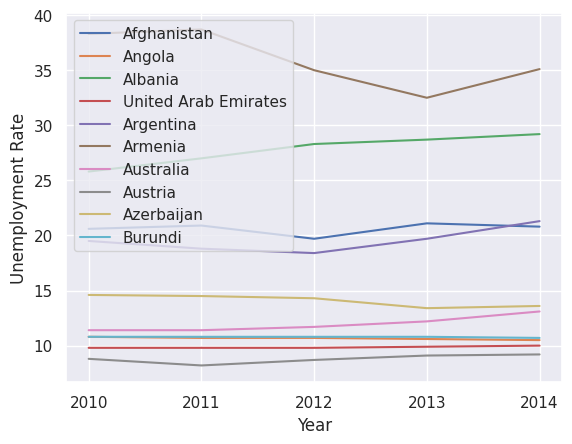

In [12]:
sns.set()
for country in selected_countries:
    sns.lineplot(data=country_data[country]["plot"],
                 x="Year", y="Unemployment Rate",
                 label=country)
    
plt.legend(loc='upper left')
plt.savefig("Test.png")